___
# Ciência dos Dados - PROJETO 1

## Manoela Cirne Lima de Campos
___

## SEGURANÇA ALIMENTAR - Evolução da fome nas diferentes regiões brasileiras com base na renda de seus moradores

___
## Introdução

        Essa pesquisa se propões a analisar a evolução da fome comparando diferentes regiões do Brasil e a renda de seus moradores com base nas pesquisas de 2009 (PNAD 2009) e de 2013 (PNAD 2013)


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\manucirne\Documents\CD\Projeto1


In [3]:
#Se usar o arquivo descompactado
dados09T = pd.read_csv('DOM2009.csv',sep=',')
dados13T = pd.read_csv('DOM2013.csv',sep=',')
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
#dados09 = pd.DataFrame({'UF':dados09T.V0102,'total de moradores':dados09T.V0105,'Renda mensal por domicílio':dados09T.V4614,'Número de componentes do domicílio':dados09T.V4620,'Rendimento mensal per capta':dados09T.V4622,'preocupação de alimentos acabarem':dados09T.V2103,'alimentos acabaram':dados09T.V2105,'falta de dinheiro para alimentação saudável':dados09T.V2107,'comeram o que tinha/sem dinheiro':dados09T.V2109})
dados09 = dados09T.loc[:,["UF","V4614","V4620","V4622","V2103","V2105","V2107","V2109","V0105"]]
naonulos09 = dados09[pd.notnull(dados09.V4622)&pd.notnull(dados09.V4620)&pd.notnull(dados09.V2109)&pd.notnull(dados09.V2107)&pd.notnull(dados09.V2105)&pd.notnull(dados09.V0105)]
naonulos09 = naonulos09[dados09.V4614!=999999999999]


C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [5]:
dados13 = dados13T.loc[:,["UF","V4614","V4620","V4622","V2103","V2105","V2107","V2109","V0105"]]
naonulos13 = dados13[pd.notnull(dados13.V4622)&pd.notnull(dados13.V4620)&pd.notnull(dados13.V2109)&pd.notnull(dados13.V2107)&pd.notnull(dados13.V2105)&pd.notnull(dados13.V0105)]
naonulos13 = naonulos13[dados13.V4614!=999999999999]


C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [6]:
naonulos09.V2103 = dados09.V2103.astype('category')
naonulos09.V2103.cat.categories = (['Sim', 'Não'])
naonulos09.V2105 = dados09.V2103.astype('category')
naonulos09.V2105.cat.categories = (['Sim', 'Não'])
naonulos09.V2107 = dados09.V2103.astype('category')
naonulos09.V2107.cat.categories = (['Sim', 'Não'])
naonulos09.V2109 = dados09.V2103.astype('category')
naonulos09.V2109.cat.categories = (['Sim', 'Não'])
naonulos09.UF = dados09.UF.astype('category')
naonulos09.UF.cat.categories = (['Rondônia', 'Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piaui','Ceará','Rio Grande do Norte','Paraíba','Pernamnuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de janeiro','Sâo Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
naonulos09.loc[(naonulos09.UF=='Rondônia') | (naonulos09.UF=='Acre') | (naonulos09.UF=='Amazonas') | (naonulos09.UF=='Roraima') | (naonulos09.UF=='Pará') | (naonulos09.UF=='Amapá') | (naonulos09.UF=='Tocantins'),'Regiao'] = 'Norte'
naonulos09.loc[(naonulos09.UF=='Maranhão') | (naonulos09.UF=='Piaui') | (naonulos09.UF=='Caerá') | (naonulos09.UF=='Rio Grande do Norte') | (naonulos09.UF=='Paraíba') | (naonulos09.UF=='Pernambuco') | (naonulos09.UF=='Alagoas') | (naonulos09.UF=='Sergipe') | (naonulos09.UF=='Bahia'),'Regiao'] = 'Nordeste'
naonulos09.loc[(naonulos09.UF=='Minas Gerais') | (naonulos09.UF=='Espirito Santo') | (naonulos09.UF=='Rio de Janeiro') | (naonulos09.UF=='São Paulo'),'Regiao'] = 'Sudeste'
naonulos09.loc[(naonulos09.UF=='Paraná') | (naonulos09.UF=='Santa Catarina') | (naonulos09.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
naonulos09.loc[(naonulos09.UF=='Mato Grosso do Sul') | (naonulos09.UF=='Mato Grosso') | (naonulos09.UF=='Goiás') | (naonulos09.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'


In [7]:
naonulos13.V2103 = dados13.V2103.astype('category')
naonulos13.V2103.cat.categories = (['Sim', 'Não'])
naonulos13.V2105 = dados13.V2103.astype('category')
naonulos13.V2105.cat.categories = (['Sim', 'Não'])
naonulos13.V2107 = dados13.V2103.astype('category')
naonulos13.V2107.cat.categories = (['Sim', 'Não'])
naonulos13.V2109 = dados13.V2103.astype('category')
naonulos13.V2109.cat.categories = (['Sim', 'Não'])
naonulos13.UF = dados13.UF.astype('category')
naonulos13.UF.cat.categories = (['Rondônia', 'Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piaui','Ceará','Rio Grande do Norte','Paraíba','Pernamnuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de janeiro','Sâo Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
naonulos13.loc[(naonulos13.UF=='Rondônia') | (naonulos13.UF=='Acre') | (naonulos13.UF=='Amazonas') | (naonulos13.UF=='Roraima') | (naonulos13.UF=='Pará') | (naonulos13.UF=='Amapá') | (naonulos13.UF=='Tocantins'),'Regiao'] = 'Norte'
naonulos13.loc[(naonulos13.UF=='Maranhão') | (naonulos13.UF=='Piaui') | (naonulos13.UF=='Caerá') | (naonulos13.UF=='Rio Grande do Norte') | (naonulos13.UF=='Paraíba') | (naonulos13.UF=='Pernambuco') | (naonulos13.UF=='Alagoas') | (naonulos13.UF=='Sergipe') | (naonulos13.UF=='Bahia'),'Regiao'] = 'Nordeste'
naonulos13.loc[(naonulos13.UF=='Minas Gerais') | (naonulos13.UF=='Espirito Santo') | (naonulos13.UF=='Rio de Janeiro') | (naonulos13.UF=='São Paulo'),'Regiao'] = 'Sudeste'
naonulos13.loc[(naonulos13.UF=='Paraná') | (naonulos13.UF=='Santa Catarina') | (naonulos13.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
naonulos13.loc[(naonulos13.UF=='Mato Grosso do Sul') | (naonulos13.UF=='Mato Grosso') | (naonulos13.UF=='Goiás') | (naonulos13.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'


In [8]:
dados09 = naonulos09.rename(columns={"V0105":'Totmora',"V4614":'RMDom','V4620':'NComDom','V4622':'RMCap','V2103':'PreAliAcab','V2105':'AliAcab','V2107':'SemAliSau','V2109':'SemDComeTem'})
dados09.loc[(dados09.AliAcab == 'Sim'),'Segali'] = 'Não'
#dados09.loc[(dados09.AliAcab != 'Sim') & (dados09.PreAliAcab == 'Sim') ,'Segali'] = 'Baixa'
#dados09.loc[(dados09.AliAcab != 'Sim') & (dados09.PreAliAcab != 'Sim') & (dados09.SemDComeTem == 'Sim'),'Segali'] ='Moderada'
#dados09.loc[(dados09.AliAcab != 'Sim') & (dados09.PreAliAcab != 'Sim') & (dados09.SemDComeTem != 'Sim') & (dados09.SemAliSau == 'Sim'),'Segali'] = 'Alta'
dados09.loc[(dados09.AliAcab != 'Sim') & (dados09.PreAliAcab != 'Sim') & (dados09.SemDComeTem != 'Sim') & (dados09.SemAliSau != 'Sim'),'Segali'] = 'Sim'
dados09

,UF,RMDom,NComDom,RMCap,PreAliAcab,AliAcab,SemAliSau,SemDComeTem,Totmora,Regiao,Segali
2,Rondônia,828.0,7.0,2.0,Sim,Sim,Sim,Sim,7.0,Norte,Não
3,Rondônia,3160.0,3.0,5.0,Não,Não,Não,Não,3.0,Norte,Sim
4,Rondônia,930.0,1.0,4.0,Não,Não,Não,Não,1.0,Norte,Sim
6,Rondônia,465.0,2.0,2.0,Não,Não,Não,Não,2.0,Norte,Sim
7,Rondônia,994.0,4.0,3.0,Não,Não,Não,Não,4.0,Norte,Sim
8,Rondônia,295.0,5.0,1.0,Sim,Sim,Sim,Sim,5.0,Norte,Não
9,Rondônia,6512.0,1.0,7.0,Sim,Sim,Sim,Sim,1.0,Norte,Não
10,Rondônia,526.0,6.0,1.0,Sim,Sim,Sim,Sim,6.0,Norte,Não
12,Rondônia,1242.0,5.0,3.0,Não,Não,Não,Não,5.0,Norte,Sim
13,Rondônia,0.0,3.0,0.0,Não,Não,Não,Não,3.0,Norte,Sim


In [9]:
dados13 = naonulos13.rename(columns={"V0105":'Totmora',"V4614":'RMDom','V4620':'NComDom','V4622':'RMCap','V2103':'PreAliAcab','V2105':'AliAcab','V2107':'SemAliSau','V2109':'SemDComeTem'})
dados13.loc[(dados13.AliAcab == 'Sim'),'Segali'] = 'Não'
#dados13.loc[(dados13.AliAcab != 'Sim') & (dados13.PreAliAcab == 'Sim') ,'Segali'] = 'Baixa'
#dados13.loc[(dados13.AliAcab != 'Sim') & (dados13.PreAliAcab != 'Sim') & (dados13.SemDComeTem == 'Sim'),'Segali'] ='Moderada'
#dados13.loc[(dados13.AliAcab != 'Sim') & (dados13.PreAliAcab != 'Sim') & (dados13.SemDComeTem != 'Sim') & (dados13.SemAliSau == 'Sim'),'Segali'] = 'Alta'
dados13.loc[(dados13.AliAcab != 'Sim') & (dados13.PreAliAcab != 'Sim') & (dados13.SemDComeTem != 'Sim') & (dados13.SemAliSau != 'Sim'),'Segali'] = 'Sim'
dados13

,UF,RMDom,NComDom,RMCap,PreAliAcab,AliAcab,SemAliSau,SemDComeTem,Totmora,Regiao,Segali
2,Rondônia,350.0,1.0,3.0,Não,Não,Não,Não,1.0,Norte,Sim
3,Rondônia,678.0,2.0,2.0,Não,Não,Não,Não,2.0,Norte,Sim
4,Rondônia,800.0,3.0,2.0,Não,Não,Não,Não,3.0,Norte,Sim
5,Rondônia,800.0,2.0,3.0,Não,Não,Não,Não,2.0,Norte,Sim
6,Rondônia,1234.0,3.0,3.0,Não,Não,Não,Não,3.0,Norte,Sim
7,Rondônia,4000.0,3.0,4.0,Não,Não,Não,Não,3.0,Norte,Sim
8,Rondônia,3500.0,2.0,5.0,Não,Não,Não,Não,2.0,Norte,Sim
9,Rondônia,1300.0,1.0,4.0,Não,Não,Não,Não,1.0,Norte,Sim
10,Rondônia,1400.0,5.0,2.0,Sim,Sim,Sim,Sim,5.0,Norte,Não
11,Rondônia,1000.0,3.0,2.0,Não,Não,Não,Não,3.0,Norte,Sim


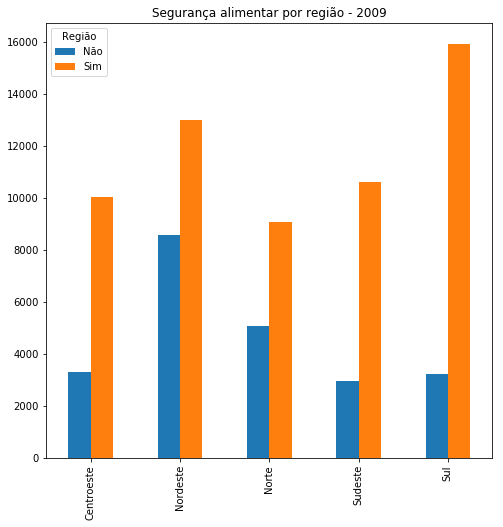

In [45]:
segurreg09 = pd.crosstab(dados09.Regiao,dados09.Segali,rownames=[''], colnames=['Região'])
#faixa = range(10,500,50)
# RENDA_cat = pd.cut(len(dados09.Regiao), bins=faixa)
# RENDA_cat.value_counts(sort=False, normalize=True)*100
segurreg09.plot(kind='bar',  figsize=(8,8),legend = True)
plt.title('Segurança alimentar por região - 2009')

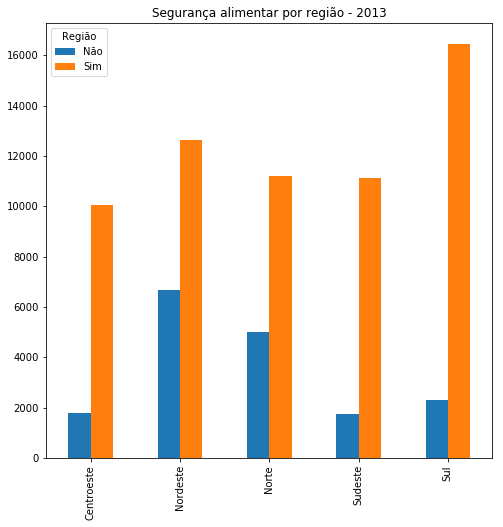

In [49]:
ct6 = pd.crosstab(dados13.Regiao,dados13.Segali,rownames=[''], colnames=['Região'])
#faixa = range(10,500,50)
# RENDA_cat = pd.cut(len(dados09.Regiao), bins=faixa)
# RENDA_cat.value_counts(sort=False, normalize=True)*100
ct6.plot(kind='bar',  figsize=(8,8),legend = True)
plt.title('Segurança alimentar por região - 2013')

In [12]:
# Segalim09 = dados09.Segali.value_counts().reindex(['Não','Sim'])
# #Segalim = dados09.SemDComeTem.value_counts().reindex(['Sim','Não'])

# Segalim09 = dados09.Segali.value_counts().reindex(['Não','Sim'])
# Segalim09.plot(kind='pie', colors=('blue','orange'), autopct="%.2f", legend=False, title='Segurança Alimentar 2009')

In [13]:
# Segalim13 = dados13.Segali.value_counts().reindex(['Não','Sim'])
# Segalim13.plot(kind='pie', colors=('blue','orange'), autopct="%.2f", legend=False,title='Segurança Alimentar 2013')

In [14]:
dadosN09 = dados09[dados09.Regiao== 'Norte']
dadosNE09 = dados09[dados09.Regiao== 'Nordeste']
dadosSE09 = dados09[dados09.Regiao== 'Sudeste']
dadosS09 = dados09[dados09.Regiao== 'Sul']
dadosCO09 = dados09[dados09.Regiao== 'Centroeste']

dadosN13 = dados13[dados13.Regiao== 'Norte']
dadosNE13 = dados13[dados13.Regiao== 'Nordeste']
dadosSE13 = dados13[dados13.Regiao== 'Sudeste']
dadosS13 = dados13[dados13.Regiao== 'Sul']
dadosCO13 = dados13[dados13.Regiao== 'Centroeste']


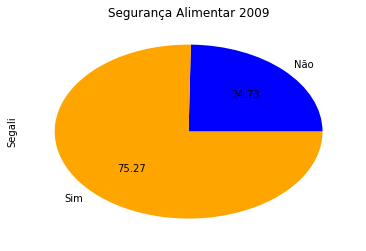

In [15]:
SegalimCO09 = dadosCO09.Segali.value_counts().reindex(['Não','Sim'])
SegalimCO09.plot(kind='pie', colors=('blue','orange'), autopct="%.2f", legend=False,title='Segurança Alimentar 2009')

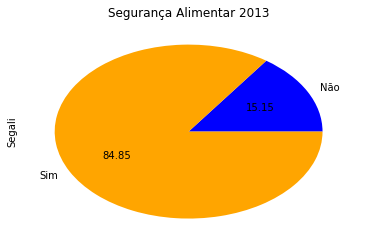

In [16]:
SegalimCO13 = dadosCO13.Segali.value_counts().reindex(['Não','Sim'])
SegalimCO13.plot(kind='pie', colors=('blue','orange'), autopct="%.2f", legend=False,title='Segurança Alimentar 2013')

In [29]:
SegalimCO13

Não     1793
Sim    10042
Name: Segali, dtype: int64

In [31]:
merged = pd.DataFrame({"2009": SegalimCO09, "2013": SegalimCO13})

,2009,2013
Não,3297,1793
Sim,10035,10042


64.14095049784619
69.08394588918402


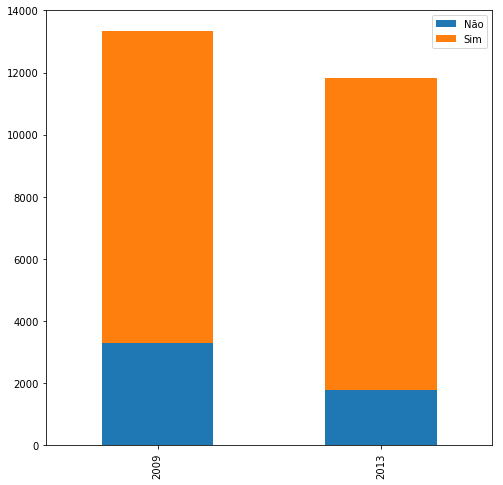

In [56]:
listat = [1,2]
TotalN09 = len(dadosN09)
TotalN13 = len(dadosN13)
SimN09 = (len(dadosN09[dadosN09.Segali == 'Sim'])/TotalN09)*100
SimN13 = (len(dadosN13[dadosN13.Segali == 'Sim'])/TotalN13)*100
NãoN09 = (len(dadosN09[dadosN09.Segali == 'Não'])/TotalN09)*100
NãoN13 = (len(dadosN13[dadosN13.Segali == 'Não'])/TotalN13)*100
print(SimN09)
print(SimN13)
Segalim = pd.crosstab(dadosN09.Segali,dadosN13.Segali,rownames=['Ano'], colnames=['Respostas'], normalize = True)
merged.T.plot(kind='bar',  figsize=(8,8),legend = True, stacked=True)

In [22]:
Segalim

Respostas,Não,Sim
Ano,,
Não,1185,2672
Sim,2164,4779


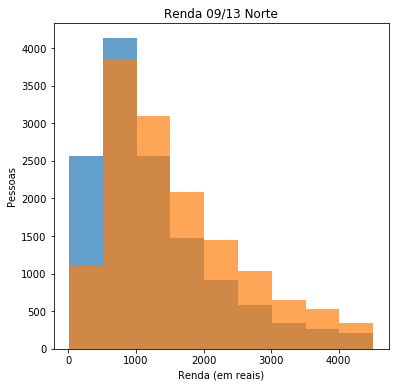

In [42]:
#dadosS09.RMCap.plot(kind='hist')
faixa = range(10,5000,500)
plot = dadosN09.RMDom.plot.hist(bins=faixa,title='Renda 09/13 Norte', figsize=(6, 6), alpha=0.7)
plt.ylabel('Pessoas')
plt.xlabel('Renda (em reais)')

faixa = range(10,5000,500)
plot2 = dadosN13.RMDom.plot.hist(bins=faixa,title='Renda 09/13 Norte', figsize=(6, 6), alpha=0.7, ax=plot)
plt.ylabel('Pessoas')
plt.xlabel('Renda (em reais)')



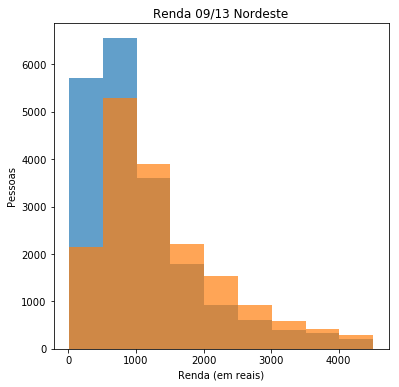

In [43]:
faixa = range(10,5000,500)
plot = dadosNE09.RMDom.plot.hist(bins=faixa,title='Renda 09/13 Nordeste', figsize=(6, 6), alpha=0.7)
plt.ylabel('Pessoas')
plt.xlabel('Renda (em reais)')


faixa = range(10,5000,500)
plot2 = dadosNE13.RMDom.plot.hist(bins=faixa,title='Renda 09/13 Nordeste', figsize=(6, 6), alpha=0.7, ax=plot)
plt.ylabel('Pessoas')
plt.xlabel('Renda (em reais)')

___
## Conclusão 

Descreva aqui suas conclusões!